In [1]:
import pandas as pd

# Load the dataset
data_file_path = './DataScienceAssignment.csv'
data = pd.read_csv(data_file_path)

# Load the Data Dictionary
data_dictionary_file_path = './DataDictionary.xlsx'
data_dictionary = pd.read_excel(data_dictionary_file_path)

# Display the first few rows of both dataframes to understand their structure
data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,int_rate
0,545977,48654285,25000,25000,25000.0,36 months,833.83,Respiratory Manager,10+ years,MORTGAGE,...,0.0,0.0,413442.0,78492.0,9300.0,69882.0,N,Cash,N,12.29
1,892728,5626429,3125,3125,3125.0,36 months,111.84,Broadcom Corporation,10+ years,RENT,...,0.0,0.0,59695.0,27966.0,300.0,52295.0,N,Cash,N,17.27
2,171760,14660646,8025,8025,8025.0,60 months,197.68,Associate Buyer,9 years,MORTGAGE,...,0.0,0.0,308200.0,13134.0,5500.0,10000.0,N,Cash,N,16.59
3,866234,6607685,5000,5000,5000.0,36 months,177.72,Emerging Global Advisors,2 years,RENT,...,0.0,0.0,38098.0,26577.0,15700.0,22398.0,N,Cash,N,16.78
4,409091,60537487,35000,35000,35000.0,60 months,770.27,Project Manager,4 years,MORTGAGE,...,0.0,0.0,820114.0,210953.0,73900.0,80506.0,N,Cash,N,11.53


In [2]:
data.shape

(75000, 112)

In [3]:
data_dictionary.head()

,Columns,Description
0,id,A unique LC assigned ID for the loan listing.
1,loan_amnt,The listed amount of the loan applied for by t...
2,funded_amnt,The total amount committed to that loan at tha...
3,funded_amnt_inv,The total amount committed by investors for th...
4,term,The number of payments on the loan. Values are...


In [22]:
# Step 1: Remove the 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Identify columns with missing values and the extent of missingness
missing_values = data_cleaned.isnull().sum()
missing_values_percentage = (missing_values / len(data_cleaned)) * 100

# Filter columns with missing values
missing_values_df = pd.DataFrame({'missing_values': missing_values, 'percentage': missing_values_percentage})
missing_values_df = missing_values_df[missing_values_df['missing_values'] > 0].sort_values(by='percentage', ascending=False)

# Display columns with missing values sorted by their percentage of missingness
missing_values_df


,missing_values,percentage
desc,69655,92.873333
mths_since_last_record,62312,83.082667
mths_since_recent_bc_dlq,56669,75.558667
mths_since_last_major_derog,54833,73.110667
mths_since_recent_revol_delinq,49199,65.598667
...,...,...
dti,17,0.022667
last_credit_pull_d,5,0.006667
collections_12_mths_ex_med,4,0.005333
chargeoff_within_12_mths,4,0.005333


In [23]:
missing_values_df.head(50)

,missing_values,percentage
desc,69655,92.873333
mths_since_last_record,62312,83.082667
mths_since_recent_bc_dlq,56669,75.558667
mths_since_last_major_derog,54833,73.110667
mths_since_recent_revol_delinq,49199,65.598667
il_util,44224,58.965333
mths_since_rcnt_il,40401,53.868000
all_util,39454,52.605333
inq_fi,39450,52.600000
total_cu_tl,39450,52.600000


In [1]:
import pandas as pd
input_df = pd.read_csv("DataScienceAssignment_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'DataScienceAssignment_test.csv'

In [24]:
from sklearn.impute import SimpleImputer

# Remove columns with more than 50% missing values
columns_to_remove = missing_values_df[missing_values_df['percentage'] > 15].index
data_cleaned_filtered = data_cleaned.drop(columns=columns_to_remove)

# Impute missing values for numeric and categorical columns
# Numeric columns: Use median for imputation
numeric_columns = data_cleaned_filtered.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = SimpleImputer(strategy='median')
data_cleaned_filtered[numeric_columns] = numeric_imputer.fit_transform(data_cleaned_filtered[numeric_columns])

# Categorical columns: Use the mode (most frequent) for imputation
categorical_columns = data_cleaned_filtered.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned_filtered[categorical_columns] = categorical_imputer.fit_transform(data_cleaned_filtered[categorical_columns])

# Check if there are any missing values left
final_missing_values = data_cleaned_filtered.isnull().sum().sum()
final_missing_values

0

In [53]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = data_cleaned_filtered.corr(numeric_only=True)

# Identify pairs of highly correlated features (above 0.75)
high_corr_pairs = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_features = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) | (high_corr_pairs['Correlation'] < -0.5)]

high_corr_features.sort_values(by='Correlation', ascending=False).drop_duplicates()

,Feature 1,Feature 2,Correlation
516,fico_range_low,fico_range_high,1.000000
968,out_prncp,out_prncp_inv,0.999998
68,loan_amnt,funded_amnt,0.999688
1071,total_pymnt,total_pymnt_inv,0.999020
135,funded_amnt,funded_amnt_inv,0.998975
...,...,...,...
857,revol_bal,total_bal_ex_mort,0.502762
2011,mo_sin_rcnt_tl,num_tl_op_past_12m,-0.501051
669,inq_last_6mths,mths_since_recent_inq,-0.510691
1785,bc_open_to_buy,bc_util,-0.547317


In [54]:
high_corr_features.sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
516,fico_range_low,fico_range_high,1.000000
968,out_prncp,out_prncp_inv,0.999998
68,loan_amnt,funded_amnt,0.999688
1071,total_pymnt,total_pymnt_inv,0.999020
135,funded_amnt,funded_amnt_inv,0.998975
...,...,...,...
857,revol_bal,total_bal_ex_mort,0.502762
2011,mo_sin_rcnt_tl,num_tl_op_past_12m,-0.501051
669,inq_last_6mths,mths_since_recent_inq,-0.510691
1785,bc_open_to_buy,bc_util,-0.547317


In [55]:
# List of features to remove
features_to_remove = high_corr_features.sort_values(by='Correlation', ascending=False)['Feature 1'].drop_duplicates().values.tolist()
# features_to_remove = [
#     'fico_range_high', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv',
#     'total_pymnt_inv', 'total_rec_prncp', 'num_sats', 'total_rev_hi_lim',
#     'num_rev_tl_bal_gt_0', 'num_actv_bc_tl'
# ]

# Remove the selected features from the dataset
data_reduced_corr = data_cleaned_filtered.drop(columns=features_to_remove)

# Verify removal and new shape of the dataset
data_reduced_corr.shape

(75000, 50)

In [56]:
from sklearn.feature_selection import f_regression, SelectKBest

# Define the features and target variable
X = data_reduced_corr.drop('int_rate', axis=1).select_dtypes(include=[np.number])  
y = data_reduced_corr['int_rate']

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

# Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns

# Print the 10 best features
top_features = featureScores.nlargest(75,'Score')
top_features

,Feature,Score
4,total_rec_int,15204.082697
2,fico_range_high,13063.498841
8,last_fico_range_low,5166.706648
24,percent_bc_gt_75,4156.033594
27,total_bc_limit,4005.049577
22,num_tl_op_past_12m,3427.442060
1,dti,1493.672900
15,mo_sin_old_rev_tl_op,1475.437623
17,mths_since_recent_inq,1461.648528
6,collection_recovery_fee,888.684593


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# categorical_cols = data_reduced_corr.select_dtypes(include=['object']).columns

# # # Apply LabelEncoder to each categorical column
# for col in categorical_cols:
#     data_reduced_corr[col] = le.fit_transform(data_reduced_corr[col])

# # Selecting top numerical features based on univariate selection
# top_features_list = top_features['Feature'].where(top_features['Score'] > 500).dropna().values.tolist()

# # Convert categorical variables into dummies
# # data_with_dummies = pd.get_dummies(data_reduced_corr, columns=categorical_cols, drop_first=True)

# X = data_reduced_corr[top_features_list]  # Exclude target variable and ID
# y = data_reduced_corr['int_rate']

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)



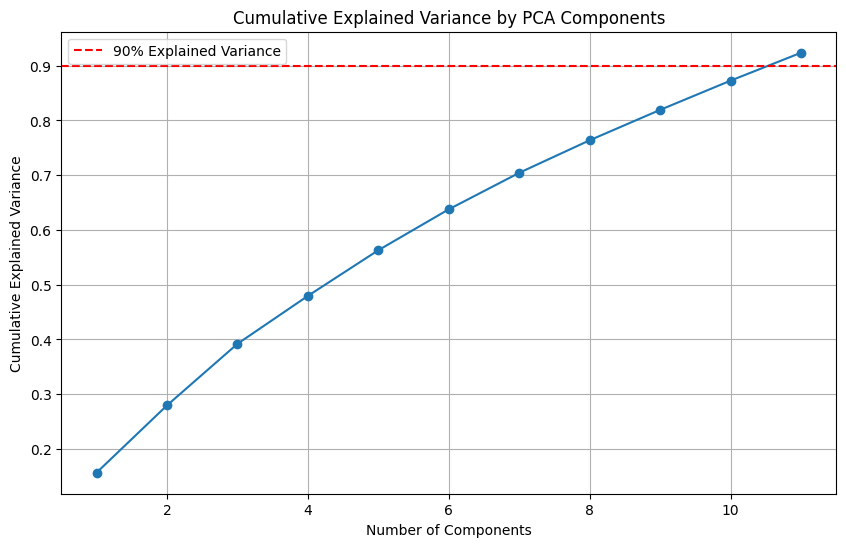

In [58]:
# Fit PCA without specifying the number of components to analyze variance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_full = PCA(n_components=0.90)
pca_full.fit(X_scaled)

# Calculate cumulative variance explained by each component
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.legend(loc='best')

# Show the plot
plt.show()

In [59]:
cumulative_variance

array([0.15663034, 0.27950797, 0.39197728, 0.47954282, 0.56298477,
       0.63769502, 0.70435366, 0.76378498, 0.81929578, 0.87268698,
       0.92366035])

In [60]:
# Add categorical features to X scaled
X_scaled = np.concatenate((X_scaled, data_reduced_corr[categorical_cols]), axis=1)

In [49]:
import joblib
# Load the trained model
model = joblib.load('xgb_loan_rate_predictor.pkl')

In [5]:
import pandas as pd
test_df = pd.read_csv('DataScienceAssignment_test.csv')
test_df = test_df.head(1)

In [6]:
test_df.to_csv("DataScienceAssignment_test.csv", index=False)

In [12]:
import numpy as np

input_df = pd.read_csv('DataScienceAssignment_test.csv')

categorical_cols = ['term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

x_cols = ['total_rec_int',
 'fico_range_high',
 'last_fico_range_low',
 'percent_bc_gt_75',
 'total_bc_limit',
 'num_tl_op_past_12m',
 'dti',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_inq',
 'collection_recovery_fee',
 'mths_since_recent_bc',
 'out_prncp_inv',
 'annual_inc']

cols_to_keep = x_cols + categorical_cols



# Initialize LabelEncoder
le = LabelEncoder()
input_preprocessed_df = input_df.copy()

input_preprocessed_df = input_preprocessed_df[cols_to_keep]

# Apply LabelEncoder to each categorical column

for col in categorical_cols:
    input_preprocessed_df[col] = le.fit_transform(input_preprocessed_df[col])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_preprocessed_df[x_cols])

# Add categorical features to X scaled
input_preprocessed_df = np.concatenate((X_scaled, input_preprocessed_df[categorical_cols]), axis=1)

In [14]:
len(input_preprocessed_df)

1

In [15]:
len(input_df)

1

In [67]:
def predict(input_data):
    # Process the input_data to the format your model expects
    # For example, if your model expects a DataFrame, ensure input_data is converted accordingly
    prediction = model.predict(input_data)
    return prediction

In [81]:
preds = predict(input_preprocessed_df)
preds_df = pd.DataFrame(preds, columns=['Interest_Rate'])

In [83]:
# make a final dataframe with both input data and predictions
final_df = pd.concat([input_df, preds_df], axis=1).drop('Unnamed: 0', axis=1)
final_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,sub_grade,emp_title,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Interest_Rate
0,7680704,15000,15000,15000.0,36 months,535.54,C5,Associate Athletic Director,6 years,MORTGAGE,...,0.0,0.0,242934.0,37641.0,20400.0,18634.0,N,Cash,N,15.342002
1,78820328,10000,10000,10000.0,36 months,325.62,A5,Assistant attorney general III,2 years,RENT,...,0.0,0.0,228463.0,196024.0,14800.0,213663.0,N,Cash,N,16.741495
2,2837522,18825,18825,18750.0,36 months,644.22,B5,the home depot,10+ years,RENT,...,1.0,0.0,26079.0,20338.0,10100.0,15479.0,N,Cash,N,14.824772
3,1250836,18000,18000,18000.0,36 months,571.56,A5,Devellis Zrein Inc.,10+ years,MORTGAGE,...,0.0,0.0,NaN,26677.0,39800.0,NaN,N,Cash,N,14.815974
4,67436726,14000,14000,14000.0,60 months,323.37,C4,Teir III Product Team Engineer,2 years,RENT,...,0.0,0.0,66706.0,56960.0,13900.0,52184.0,N,Cash,N,17.338760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,109121674,10000,10000,10000.0,36 months,339.79,C2,Lead Home Care Consultant,2 years,RENT,...,0.0,0.0,95712.0,77232.0,17100.0,63912.0,N,Cash,N,18.340109
74996,67595791,20000,20000,20000.0,60 months,422.59,B3,Vice President,10+ years,RENT,...,0.0,0.0,77439.0,40297.0,42600.0,33839.0,N,Cash,N,18.823927
74997,85218434,17500,17500,17500.0,60 months,376.06,B3,Director of Human Resources,10+ years,MORTGAGE,...,0.0,0.0,383264.0,86219.0,68700.0,57564.0,N,Cash,N,18.833603
74998,63334502,17000,17000,17000.0,36 months,575.51,C3,Transport driver,3 years,MORTGAGE,...,0.0,0.0,100620.0,27200.0,16400.0,11520.0,N,Cash,N,16.084156


In [74]:
preds_df

,Interest_Rate
0,9.588812
1,10.377334
2,15.331416
3,8.095693
4,13.433542
...,...
74995,13.898028
74996,11.682607
74997,14.086054
74998,12.758371


In [44]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns.tolist() + list(categorical_cols))

In [47]:
X.columns.tolist()

['total_rec_int',
 'fico_range_high',
 'last_fico_range_low',
 'percent_bc_gt_75',
 'total_bc_limit',
 'num_tl_op_past_12m',
 'dti',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_inq',
 'collection_recovery_fee',
 'mths_since_recent_bc',
 'out_prncp_inv',
 'annual_inc']

In [61]:
X_scaled_df

,total_rec_int,fico_range_high,last_fico_range_low,percent_bc_gt_75,total_bc_limit,num_tl_op_past_12m,dti,mo_sin_old_rev_tl_op,mths_since_recent_inq,collection_recovery_fee,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,-0.266853,-0.973815,0.535799,0.306705,-0.579396,0.523431,0.060668,-0.083511,-0.115291,-0.151663,...,796.0,4.0,198.0,1.0,44.0,28.0,0.0,0.0,0.0,0.0
1,-0.565339,-0.488119,0.535799,-1.315528,-1.008586,-0.620097,-0.705504,-0.266574,0.244109,-0.151663,...,809.0,4.0,262.0,0.0,63.0,28.0,0.0,0.0,0.0,0.0
2,-0.291987,-0.650017,0.242183,1.525510,-0.760610,-1.191861,-1.151484,0.379530,-1.193491,-0.151663,...,530.0,14.0,409.0,1.0,26.0,28.0,0.0,0.0,0.0,0.0
3,-0.674499,-0.973815,0.437927,1.525510,-0.274195,-0.048333,-1.016165,-0.718847,-0.294991,-0.151663,...,83.0,34.0,157.0,0.0,61.0,49.0,0.0,0.0,0.0,0.0
4,1.982469,-0.488119,0.193247,0.869230,2.501232,-0.048333,0.602896,2.554747,-0.654391,-0.151663,...,199.0,45.0,558.0,0.0,28.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,-0.631512,-1.135714,-0.002497,-0.909260,0.107307,1.666959,0.712485,-0.126585,-1.193491,-0.151663,...,813.0,4.0,371.0,1.0,28.0,28.0,0.0,0.0,0.0,0.0
74996,0.978459,-0.326220,0.388991,1.525510,-0.092981,-1.191861,-0.760775,0.648740,0.962909,-0.151663,...,679.0,43.0,469.0,0.0,28.0,28.0,0.0,0.0,0.0,0.0
74997,-0.759027,0.159477,0.486863,0.815250,-0.193125,0.523431,0.952629,-0.169658,0.064409,-0.151663,...,549.0,14.0,477.0,1.0,93.0,28.0,1.0,0.0,0.0,0.0
74998,-0.558495,0.483275,0.927287,-0.841075,0.264677,-0.048333,-1.352557,-0.708078,-1.013791,-0.151663,...,823.0,4.0,319.0,1.0,44.0,42.0,0.0,0.0,0.0,0.0


In [32]:
pca_full.explained_variance_ratio_

array([0.0755607 , 0.06203015, 0.05648085, 0.05377749, 0.04835108,
       0.04605801, 0.04148462, 0.03819506, 0.03731832, 0.03579095,
       0.03195332, 0.03138186, 0.03031533, 0.03019981, 0.02926782,
       0.02887763, 0.02830883, 0.02688815, 0.02672731, 0.02549017,
       0.02444505, 0.02253646, 0.02190133, 0.02114337, 0.01957717,
       0.0180474 ])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2.3005736066666667, 3.0672883636229353, 0.5722687146235305)

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2.2993912984377545, 3.07565672451125, 0.5699316063278601)

In [42]:
# convert to dataframe with original column names
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.266853,-0.973815,0.535799,0.306705,-0.579396,0.523431,0.060668,-0.083511,-0.115291,-0.151663,...,796.0,4.0,198.0,1.0,44.0,28.0,0.0,0.0,0.0,0.0
1,-0.565339,-0.488119,0.535799,-1.315528,-1.008586,-0.620097,-0.705504,-0.266574,0.244109,-0.151663,...,809.0,4.0,262.0,0.0,63.0,28.0,0.0,0.0,0.0,0.0
2,-0.291987,-0.650017,0.242183,1.525510,-0.760610,-1.191861,-1.151484,0.379530,-1.193491,-0.151663,...,530.0,14.0,409.0,1.0,26.0,28.0,0.0,0.0,0.0,0.0
3,-0.674499,-0.973815,0.437927,1.525510,-0.274195,-0.048333,-1.016165,-0.718847,-0.294991,-0.151663,...,83.0,34.0,157.0,0.0,61.0,49.0,0.0,0.0,0.0,0.0
4,1.982469,-0.488119,0.193247,0.869230,2.501232,-0.048333,0.602896,2.554747,-0.654391,-0.151663,...,199.0,45.0,558.0,0.0,28.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,-0.631512,-1.135714,-0.002497,-0.909260,0.107307,1.666959,0.712485,-0.126585,-1.193491,-0.151663,...,813.0,4.0,371.0,1.0,28.0,28.0,0.0,0.0,0.0,0.0
74996,0.978459,-0.326220,0.388991,1.525510,-0.092981,-1.191861,-0.760775,0.648740,0.962909,-0.151663,...,679.0,43.0,469.0,0.0,28.0,28.0,0.0,0.0,0.0,0.0
74997,-0.759027,0.159477,0.486863,0.815250,-0.193125,0.523431,0.952629,-0.169658,0.064409,-0.151663,...,549.0,14.0,477.0,1.0,93.0,28.0,1.0,0.0,0.0,0.0
74998,-0.558495,0.483275,0.927287,-0.841075,0.264677,-0.048333,-1.352557,-0.708078,-1.013791,-0.151663,...,823.0,4.0,319.0,1.0,44.0,42.0,0.0,0.0,0.0,0.0


In [35]:
import joblib

# Assuming your model is named xgb_model
model_filename = 'xgb_loan_rate_predictor.pkl'
joblib.dump(xgb_model, model_filename)


['xgb_loan_rate_predictor.pkl']